In [1]:
import time
import matplotlib.pyplot as plt

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [2]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 1000
generations = 200
mutation_rate = 0.085
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

Generation  1
Length of the best route =  3402.9999999999995
Generation  2
Length of the best route =  3389.0
Generation  3
Length of the best route =  3179.0
Generation  4
Length of the best route =  3191.0
Generation  5
Length of the best route =  3177.0
Generation  6
Length of the best route =  3153.0
Generation  7
Length of the best route =  3187.0000000000005
Generation  8
Length of the best route =  3063.0
Generation  9
Length of the best route =  2735.0
Generation  10
Length of the best route =  3245.0
Generation  11
Length of the best route =  3251.0
Generation  12
Length of the best route =  2853.0
Generation  13
Length of the best route =  2999.0
Generation  14
Length of the best route =  3095.0
Generation  15
Length of the best route =  3247.0
Generation  16
Length of the best route =  2937.0
Generation  17
Length of the best route =  2937.0
Generation  18
Length of the best route =  3159.0
Generation  19
Length of the best route =  2991.0
Generation  20
Length of the best r

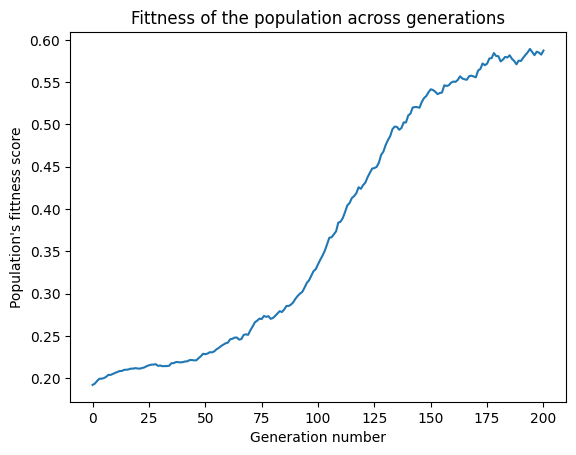

In [3]:
import matplotlib.pyplot as plt
import numpy as np
improvement = ga.population_fitness
plt.plot(improvement)
plt.title("Fittness of the population across generations")
plt.xlabel("Generation number")
plt.ylabel("Population's fittness score")
plt.show()

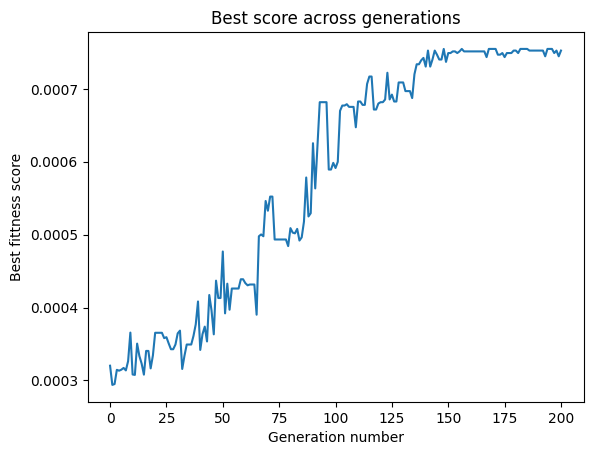

In [4]:
plt.plot(ga.best_route_across_generation)
plt.title("Best score across generations")
plt.xlabel("Generation number")
plt.ylabel("Best fittness score")
plt.show()

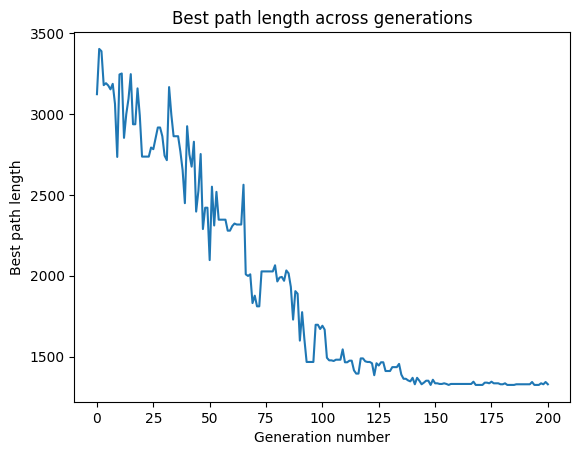

[ 1  2  5  7 14 16  4  9 18  8 10 15 12 13  6 11  3 17]
1329.0


In [5]:
best = ga.population.take_best_chromosome()
# print(ga.best_route_across_generation)
# print(1.0 / np.max(ga.best_route_across_generation))
scores = np.array(ga.best_route_across_generation)
scores = 1.0 / scores
plt.plot(scores)
plt.title("Best path length across generations")
plt.xlabel("Generation number")
plt.ylabel("Best path length")
plt.show()
print(best.get_products())
print(1.0 / best.get_score())

In [6]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

[[0, 69, 698, 240, 132, 527, 156, 459, 374, 409, 599, 428, 483, 167, 425, 221, 691, 465], [69, 0, 647, 189, 81, 476, 105, 408, 323, 358, 548, 377, 432, 116, 374, 170, 640, 414], [698, 647, 0, 472, 568, 185, 596, 345, 324, 289, 105, 270, 237, 531, 283, 491, 183, 351], [240, 189, 472, 0, 110, 301, 138, 233, 148, 183, 373, 202, 257, 73, 199, 19, 465, 239], [132, 81, 568, 110, 0, 397, 36, 329, 244, 279, 469, 298, 353, 37, 295, 91, 561, 335], [527, 476, 185, 301, 397, 0, 425, 174, 153, 118, 86, 99, 66, 360, 112, 320, 178, 180], [156, 105, 596, 138, 36, 425, 0, 357, 272, 307, 497, 326, 381, 65, 323, 119, 589, 363], [459, 408, 345, 233, 329, 174, 357, 0, 85, 56, 246, 75, 130, 292, 72, 252, 338, 26], [374, 323, 324, 148, 244, 153, 272, 85, 0, 35, 225, 54, 109, 207, 51, 167, 317, 91], [409, 358, 289, 183, 279, 118, 307, 56, 35, 0, 190, 19, 74, 242, 16, 202, 282, 62], [599, 548, 105, 373, 469, 86, 497, 246, 225, 190, 0, 171, 138, 432, 184, 392, 98, 252], [428, 377, 270, 202, 298, 99, 326, 75, 54

### Part 2: Path Finding Through Ant Colony Optimization

In [26]:
# Please keep your parameters for the ACO easily changeable here
no_ants = 5
no_gen = 10
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1.2
convergence_steps = 6

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")

spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, convergence_steps)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/hard_maze.txt
Time taken: 3.515
Route size: 965


In [8]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
convergence_steps = 6

mazes = []
specs = []
maze_types = []

# uncomment this to run graphs on mazes

# mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
#          Maze.create_maze("./../data/medium_maze.txt"), 
#          Maze.create_maze("./../data/hard_maze.txt")]

# specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"),
#          PathSpecification.read_coordinates("./../data/medium_coordinates.txt"),
#          PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

# maze_types = ["easy", "medium", "hard"]

In [9]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):
  
  parameters = [2, 4, 6, 8, 10]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, param)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " conv")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of convergence criterion on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

In [10]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [10, 15, 20, 25, 40]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, param, no_gen, q, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " no ants")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of number of ants on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

In [11]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [10, 15, 20, 25, 40]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, param, q, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " no gen")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of number of generations on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, 41, 4)))
  plt.legend()

  plt.show()

In [12]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [400, 700, 1000, 1500, 2000]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, param, evap, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)
    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " Q")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of Q on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()

In [13]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [0.1, 0.2, 0.3, 0.4]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, param, straight_factor, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " evap")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of evaporation on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

  plt.show()


In [14]:
for maze, spec, maze_type in zip(mazes, specs, maze_types):

  parameters = [1.0, 1.2, 1.5, 1.7, 2]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, param, convergence_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    plt.plot(list(range(1, len(best_routes) + 1)), list(map(lambda x: x.size(), best_routes)), label= str(param) + " straight")

  plt.xlabel("number of generations")
  plt.ylabel("length of the path")
  plt.title("Influence of straight factor on performance for " + maze_type + " maze")
  plt.xticks(list(range(1, len(best_routes) + 1)))
  plt.legend()

### Synthesis

In [17]:
# Please keep your parameters for the synthesis part easily changeable here
no_ants = 3
no_gen = 1
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
convergence_steps = 6

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, convergence_steps)

print("Constructed optimization")

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

print("Run optimization and write to file")

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

print("Read from file and print")

# Solve TSP using your own paths file
population_size = 1000
generations = 200
mutation_rate = 0.085
crossover_probability = 0.7
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

print("Solved TSP using your own paths file")


Ready reading maze file ./../data/hard_maze.txt
Constructed optimization
Run optimization and write to file
True
Read from file and print
Generation  1
Length of the best route =  5155.0
Generation  2
Length of the best route =  5155.0
Generation  3
Length of the best route =  5885.0
Generation  4
Length of the best route =  6032.999999999999
Generation  5
Length of the best route =  5731.0
Generation  6
Length of the best route =  5481.0
Generation  7
Length of the best route =  5481.0
Generation  8
Length of the best route =  6119.0
Generation  9
Length of the best route =  5844.999999999999
Generation  10
Length of the best route =  4959.0
Generation  11
Length of the best route =  5695.0
Generation  12
Length of the best route =  5339.0
Generation  13
Length of the best route =  5609.0
Generation  14
Length of the best route =  5757.0
Generation  15
Length of the best route =  5343.0
Generation  16
Length of the best route =  5475.0
Generation  17
Length of the best route =  4983.0